<a href="https://colab.research.google.com/github/ft10101/AI-ML/blob/main/Day7_MNIST_dataset_(ANN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style="font-size:80px;color:#6166B3;text-align:center"><strong>Basic</strong> <strong style="color:black">Deep Learning on MNIST Data</strong></h1>



<img src="https://miro.medium.com/max/1160/0*u5-PcKYVfUE5s2by.gif" style="width:80%"></img>

<h1 style="font-size:50px;color:#6166B3"><strong>About </strong><strong style="color:black">MNIST Data:</strong></h1>

<p style="font-size:120%">The MNIST database of handwritten digits, available from this page, has <strong>a training set of 60,000 examples, and a test set of 10,000 examples.</strong> It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.</p>

</br>

<p <strong>The images were centered in a 28x28 image by computing the center of mass of the pixels, and translating the image so as to position this point at the center of the 28x28 field.</strong></p>

<h1 style="font-size:50px;color:#6166B3"><strong>Importing </strong><strong style="color:black">Necessary Libraries:</strong></h1>

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import keras

from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils.vis_utils import plot_model

In [20]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data(path="mnist.npz")

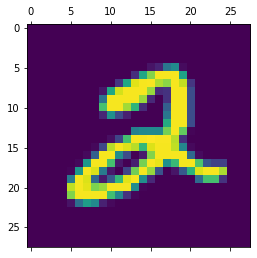

In [4]:
x_train.shape
plt.matshow(x_train[5])

In [5]:
y_train[5]

2

<h1 style="font-size:50px;color:#6166B3"><strong>Visualizing </strong><strong style="color:black">MNIST Data:</strong></h1>

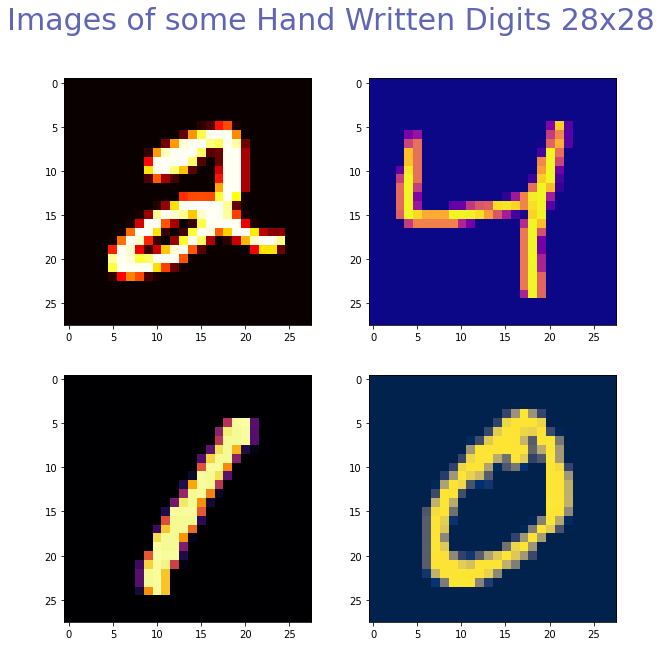

In [10]:
# Visualizing (Hidden Input)

plt.figure(figsize=[10,10])

plt.subplot(2,2,1)
n = 5
plt.imshow(x_train[n], cmap=plt.cm.hot)

plt.subplot(2,2,2)
n = 2
plt.imshow(x_train[n], cmap=plt.cm.plasma)

plt.subplot(2,2,3)
n = 3
plt.imshow(x_train[n], cmap=plt.cm.inferno)

plt.subplot(2,2,4)
n = 1
plt.imshow(x_train[n], cmap=plt.cm.cividis)

plt.suptitle("Images of some Hand Written Digits 28x28", size=30, color="#6166B3")

plt.show()

In [12]:
# DIFFERENT COLOURS:
# hot'
# 'jet'
# 'Blues'
# 'Greens'
# 'gray'
# 'viridis'
# 'plasma'
# 'inferno'
# 'magma'
# 'cividis'

<h1 style="font-size:50px;color:#6166B3"><strong>Pre-Processing </strong><strong style="color:black">The Data:</strong></h1>

In [21]:
x_train[1]
#CAN RANGE FROM 0 - 255

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [22]:
# Fixing the dimensions of the train set
x_train = x_train.reshape(-1, 28*28)
x_train = x_train.astype('float32') / 255


# Fixing the dimensions of the test set
x_test = x_test.reshape(-1, 28*28)
x_test = x_test.astype('float32') / 255

In [27]:
x_train[0]
#RANGES JUST B/W 0 AND 1  

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [26]:
y_train[0]

5

In [24]:
x_train.shape

(60000, 784)

<h1 style="font-size:50px;color:#6166B3"><strong>Designing </strong><strong style="color:black">The Neural Network:</strong></h1>

In [28]:
# Making the model (Hidden Output)

nn_model = Sequential()
nn_model.add(Dense(35, input_dim=784, activation='relu'))
nn_model.add(Dense(21, activation='relu'))
nn_model.add(Dense(10, activation='softmax'))

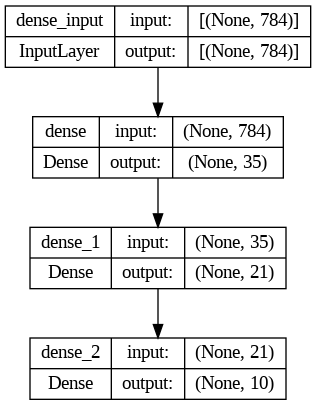

In [29]:
# Visualizing the model (Hidden Input)

plot_model(nn_model, show_shapes=True, show_layer_names=True)

<h1 style="font-size:50px;color:#6166B3"><strong>Compiling </strong><strong style="color:black">The Model:</strong></h1>

In [30]:
# Compiling the model
nn_model.compile(loss='SparseCategoricalCrossentropy', optimizer='adam', metrics=['accuracy'])

<h1 style="font-size:50px;color:#6166B3"><strong>Training </strong><strong style="color:black">The Model:</strong></h1>

In [32]:
# Fitting the model

nn_model.fit(x_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0311 - accuracy: 0.9900
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0289 - accuracy: 0.9901
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0276 - accuracy: 0.9909
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0267 - accuracy: 0.9911
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0239 - accuracy: 0.9923
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0233 - accuracy: 0.9926
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0221 - accuracy: 0.9926
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0212 - accuracy: 0.9928
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0196 - accuracy: 0.9936
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.019

<h1 style="font-size:50px;color:#6166B3"><strong>Evaluating </strong><strong style="color:black">The Model:</strong></h1>

In [33]:
# Evaluating the model

scores_train = nn_model.evaluate(x_train, y_train)
print("\n%s: %.2f%%" % (nn_model.metrics_names[0], scores_train[1]*100))

scores_test = nn_model.evaluate(x_test, y_test)
print("\n%s: %.2f%%" % (nn_model.metrics_names[1], scores_test[1]*100))

1875/1875 [==============================] - 2s 978us/step - loss: 0.0166 - accuracy: 0.9944

loss: 99.44%
313/313 [==============================] - 0s 1ms/step - loss: 0.1586 - accuracy: 0.9706

accuracy: 97.06%


In [34]:
nn_model.metrics_names

['loss', 'accuracy']

313/313 [==============================] - 0s 846us/step


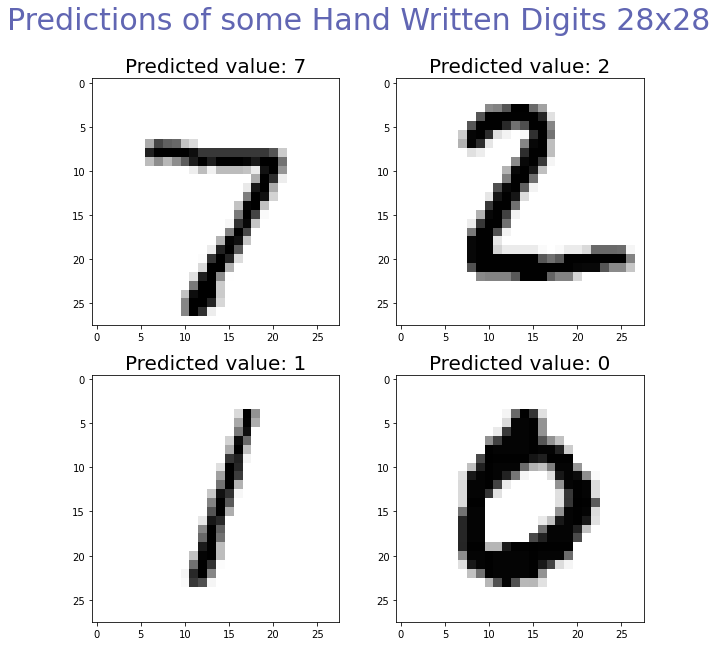

In [35]:
# Predictions (Hidden Input)

predictions = nn_model.predict(x_test)

plt.figure(figsize=[10,10])

plt.subplot(2,2,1)
n = 0
plt.imshow(x_test[n].reshape(28, 28), cmap=plt.cm.binary)
plt.title("Predicted value: " + str(np.argmax(predictions[n], axis=0)), size=20)

plt.subplot(2,2,2)
n = 1
plt.imshow(x_test[n].reshape(28, 28), cmap=plt.cm.binary)
plt.title("Predicted value: " + str(np.argmax(predictions[n], axis=0)), size=20)

plt.subplot(2,2,3)
n = 2
plt.imshow(x_test[n].reshape(28, 28), cmap=plt.cm.binary)
plt.title("Predicted value: " + str(np.argmax(predictions[n], axis=0)), size=20)

plt.subplot(2,2,4)
n = 3
plt.imshow(x_test[n].reshape(28, 28), cmap=plt.cm.binary)
plt.title("Predicted value: " + str(np.argmax(predictions[n], axis=0)), size=20)

plt.suptitle("Predictions of some Hand Written Digits 28x28", size=30, color="#6166B3")

plt.show()